In [41]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Load the dataset and remove the first column
data = pd.read_csv('Healthcare_Diabetes.csv')
data = data.iloc[:, 1:]  # Remove the first column

# Remove outliers using Z-score method
z_scores = np.abs(zscore(data.iloc[:, :-1]))  # Exclude target column for Z-score
data = data[(z_scores < 3).all(axis=1)]

X = data.iloc[:, :-1]  # Features
y = data['Outcome']    # Target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_accuracies = []
val_accuracies = []

# Extended Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with extended parameters
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Loop over each fold
best_overall_model = None
highest_val_accuracy = 0

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Fit the model with grid search
    grid_search.fit(X_train, y_train)

    # Get the best estimator
    best_rf = grid_search.best_estimator_

    # Make predictions
    y_train_pred = best_rf.predict(X_train)
    y_val_pred = best_rf.predict(X_val)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Training Accuracy: {train_accuracy:.4f} - Validation Accuracy: {val_accuracy:.4f}")
    print(classification_report(y_val, y_val_pred))

    # Save the best model based on validation accuracy
    if val_accuracy > highest_val_accuracy:
        highest_val_accuracy = val_accuracy
        best_overall_model = best_rf

# Calculate average accuracies
average_train_accuracy = np.mean(train_accuracies)
average_val_accuracy = np.mean(val_accuracies)

print(f"\nAverage Training Accuracy across folds: {average_train_accuracy:.4f}")
print(f"Average Validation Accuracy across folds: {average_val_accuracy:.4f}")

# Save the best model to a pickle file
with open('best_random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_overall_model, f)

print("Model saved as 'best_random_forest_model.pkl'")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Training Accuracy: 1.0000 - Validation Accuracy: 0.9940
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       341
           1       0.98      1.00      0.99       155

    accuracy                           0.99       496
   macro avg       0.99      1.00      0.99       496
weighted avg       0.99      0.99      0.99       496

Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 

In [3]:
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data = pd.read_csv('Healthcare_Diabetes.csv')
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data = data.iloc[:, 1:]  # Remove the first column
data.shape
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [12]:

# Display the head of the scaled data
print("Scaled Data (First 5 Rows):")
print(X_scaled_df.head(10))

Scaled Data (First 5 Rows):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.679232  0.839738       0.149033       0.882845 -0.713633  0.181135   
1    -0.825341 -1.127124      -0.163012       0.509169 -0.713633 -0.685773   
2     1.281062  1.932439      -0.267027      -1.296931 -0.713633 -1.094459   
3    -0.825341 -1.002244      -0.163012       0.135494  0.123547 -0.500007   
4    -1.126256  0.496317      -1.515209       0.882845  0.782604  1.357654   
5     0.378318 -0.159303       0.253048      -1.296931 -0.713633 -0.809617   
6    -0.223512 -1.345664      -0.995134       0.696007  0.070110 -0.140859   
7     1.882891 -0.190523      -3.595513      -1.296931 -0.713633  0.391670   
8    -0.524427  2.369519       0.045018       1.505639  4.122420 -0.202781   
9     1.281062  0.121677       1.397215      -1.296931 -0.713633 -3.980026   

   DiabetesPedigreeFunction       Age  
0                  0.478509  1.432495  
1                 -0.369130 -0.18

In [13]:

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.122839,0.147253,-0.068673,-0.075734,0.018761,-0.027731,0.540805,0.223796
Glucose,0.122839,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.147253,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
SkinThickness,-0.068673,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,-0.075734,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.018761,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,-0.027731,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,0.540805,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,0.223796,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


In [49]:
import seaborn as sns

<Axes: >

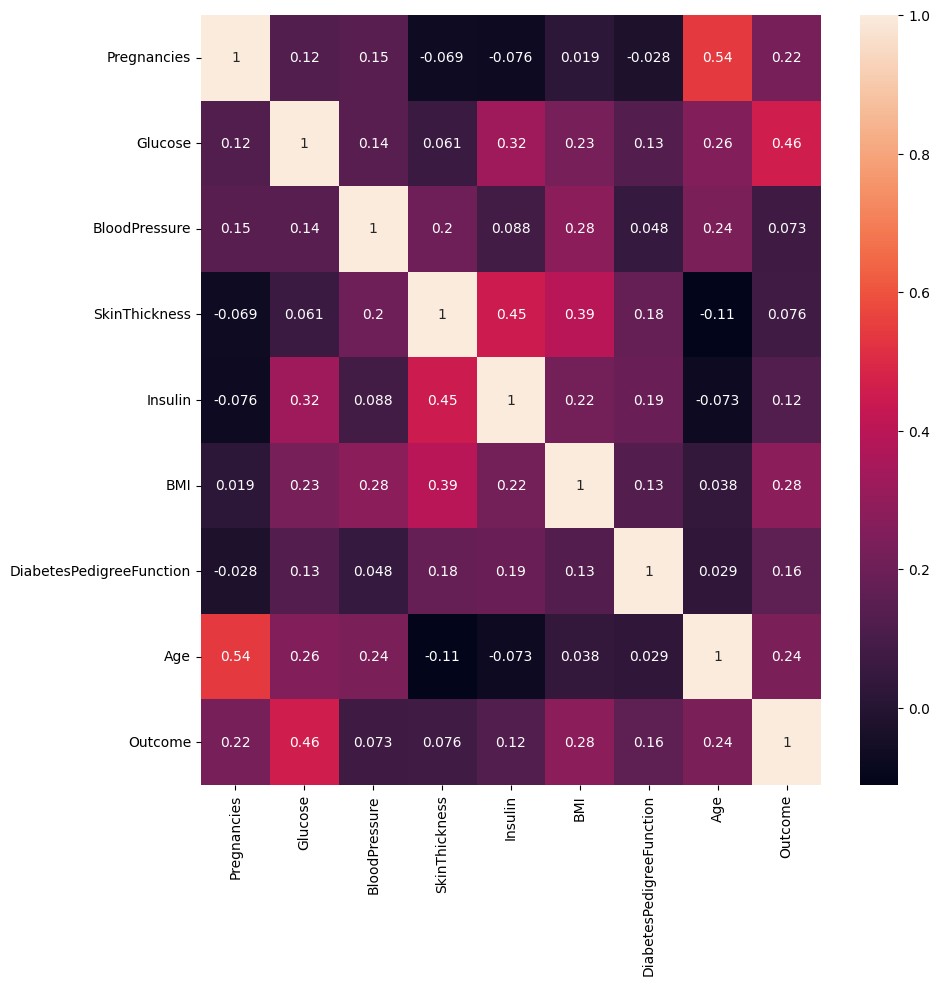

In [50]:

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)

In [8]:

X = data.iloc[:,:-1]
y = data['Outcome']

In [52]:

X.shape

(2768, 8)

In [53]:

y.shape

(2768,)

In [56]:

from sklearn.model_selection import train_test_split

In [58]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 10)


In [59]:

print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (1799, 8) (1799,)
Test Set:  (969, 8) (969,)


In [60]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [61]:

from sklearn.metrics import accuracy_score

In [62]:

print(accuracy_score(y_test, model.predict(X_test))*100)


98.0392156862745


In [63]:

import pickle

In [64]:
pickle.dump(model, open("Rediabetes1.pkl",'wb'))

In [4]:
data.max()

Id                          2768.00
Pregnancies                   17.00
Glucose                      199.00
BloodPressure                122.00
SkinThickness                110.00
Insulin                      846.00
BMI                           80.60
DiabetesPedigreeFunction       2.42
Age                           81.00
Outcome                        1.00
dtype: float64

In [6]:
data.shape

(2768, 10)

In [22]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the results
print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_rep)


Random Forest Model Performance:
Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       367
           1       0.97      0.95      0.96       187

    accuracy                           0.97       554
   macro avg       0.97      0.97      0.97       554
weighted avg       0.97      0.97      0.97       554



In [23]:
print("\nConfusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[361   6]
 [  9 178]]


Scaled Data (Head):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.679232  0.839738       0.149033       0.882845 -0.713633  0.181135   
1    -0.825341 -1.127124      -0.163012       0.509169 -0.713633 -0.685773   
2     1.281062  1.932439      -0.267027      -1.296931 -0.713633 -1.094459   
3    -0.825341 -1.002244      -0.163012       0.135494  0.123547 -0.500007   
4    -1.126256  0.496317      -1.515209       0.882845  0.782604  1.357654   

   DiabetesPedigreeFunction       Age  
0                  0.478509  1.432495  
1                 -0.369130 -0.181079  
2                  0.616712 -0.096154  
3                 -0.934224 -1.030329  
4                  5.579704 -0.011229  


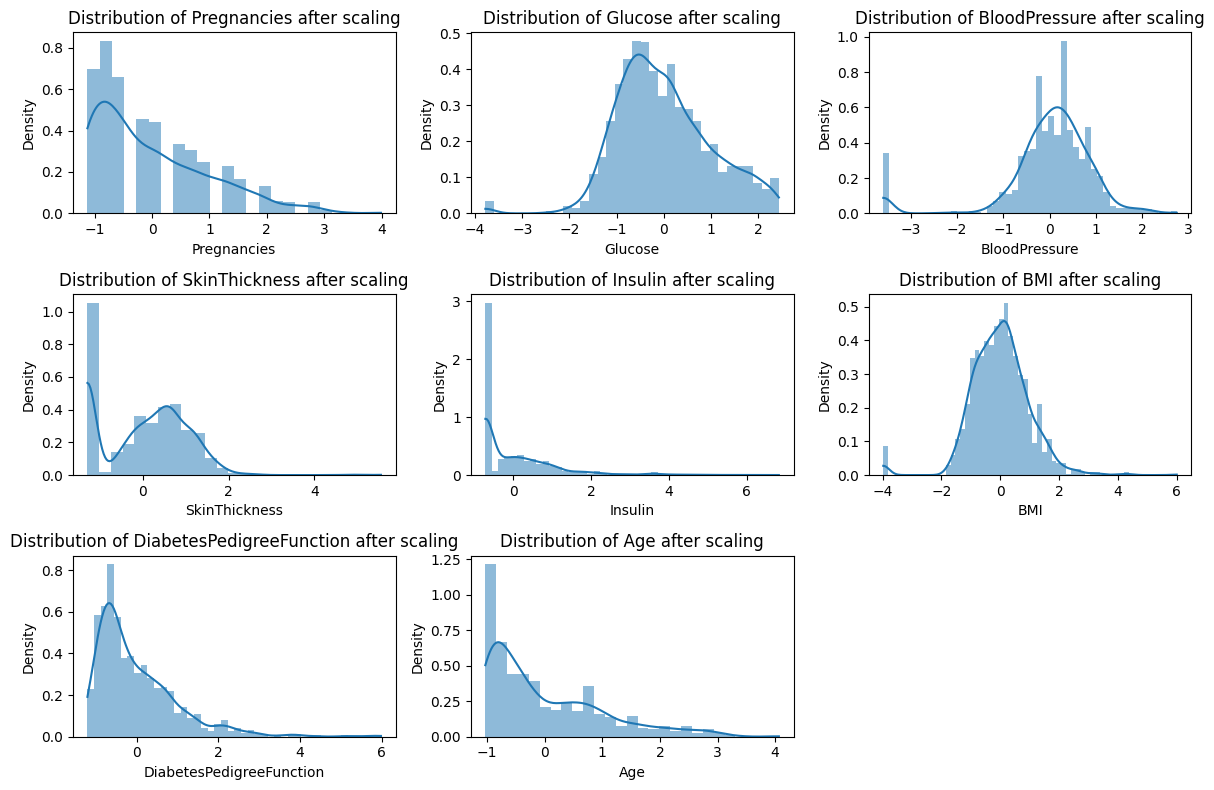

Accuracy: 96.75%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       732
           1       0.96      0.94      0.95       376

    accuracy                           0.97      1108
   macro avg       0.97      0.96      0.96      1108
weighted avg       0.97      0.97      0.97      1108



In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Load data into a DataFrame
df = pd.DataFrame(data)

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame for easy display
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of scaled data
print("Scaled Data (Head):")
print(X_scaled_df.head())

# Plot Gaussian distribution after scaling
plt.figure(figsize=(12, 8))
for i, column in enumerate(X_scaled_df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(X_scaled_df[column], kde=True, stat="density", linewidth=0)
    plt.title(f"Distribution of {column} after scaling")
plt.tight_layout()
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))